In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

<h1> The Padua Points </h1>

The objective of this note is to demonstrate how various linear algebra (and convex optimization) heuristics can be used for finding the Gauss quadrature points!

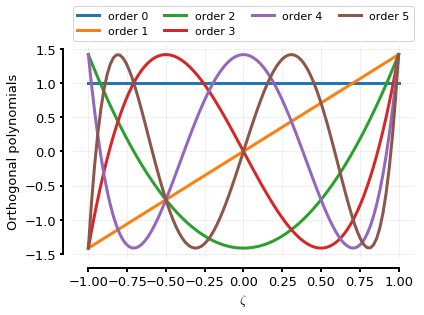

In [2]:
M = 5
x1 = Parameter(param_type='Chebyshev', order=M, lower=-1., upper=1., Lobatto=True)
x2 = Parameter(param_type='Chebyshev', order=M+1, lower=-1., upper=1., Lobatto=True)
totalorder = Basis('Total order', [M, M+1])
u = np.linspace(-1., 1., 100)
P, _ = x1._getOrthoPoly(u)
polynomialplot(P, u)

In [3]:
Polyobject = Polylsq(parameters=[x1, x2], basis=totalorder, mesh='tensor', optimization='newton', oversampling=1.0)
pfull, wfull = Polyobject.getTensorQuadratureRule()

/Users/matrix/Library/Python/2.7/lib/python/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(56, 28)


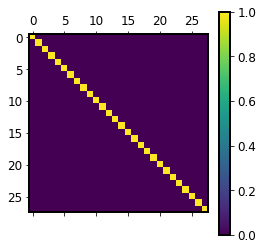

In [4]:
M = np.dot(Polyobject.A.T , Polyobject.A)
plt.matshow(M, interpolation='none', vmin=0, vmax=1)
plt.colorbar()
print Polyobject.A.shape

(28, 28)


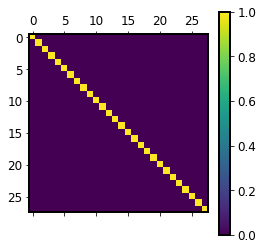

In [5]:
M = np.dot(Polyobject.Az.T , Polyobject.Az)
plt.matshow(M, interpolation='none', vmin=0, vmax=1)
plt.colorbar()
print Polyobject.Az.shape

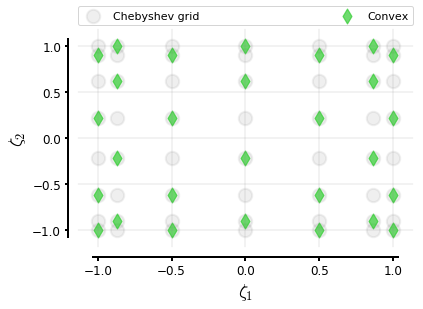

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(pfull[:,0], pfull[:,1], marker='o', s=180, alpha=0.1, color='dimgrey',linewidth=2., label='Chebyshev grid')
plt.scatter(Polyobject.pts[:,0], Polyobject.pts[:,1], marker='d', s=110, alpha=0.7, color='limegreen',linewidth=1.2, label='Convex')
adjust_spines(ax, ['left', 'bottom'])
plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='-', linewidth=0.2)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=11)
frame1 = plt.gca()
plt.xlabel('$\zeta_1$')
plt.ylabel('$\zeta_2$')
plt.show()